In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

ImportError: Qiskit is installed in an invalid environment that has both Qiskit >=1.0 and an earlier version. You should create a new virtual environment, and ensure that you do not mix dependencies between Qiskit <1.0 and >=1.0. Any packages that depend on 'qiskit-terra' are not compatible with Qiskit 1.0 and will need to be updated. Qiskit unfortunately cannot enforce this requirement during environment resolution. See https://qisk.it/packaging-1-0 for more detail.

In [2]:
secretNumber = '100010101'

In [3]:
circuit = QuantumCircuit(len(secretNumber)+1,len(secretNumber))

We need to calculate the length of the secretnumber as above.
Also we need to reverse the secret number in their range for index so as gates are applied appropriately.
There are couple of ways to reverse one 
1. as enumerate [::-1] as 
2. for index, one in enumerate(reversed(secretNumber))


In [4]:
circuit.h(range(len(secretNumber)))
circuit.x(len(secretNumber))
circuit.h(len(secretNumber))
circuit.barrier()
for index, one in enumerate(secretNumber[::-1]):
    print(f"index{index} is {one}")
    if one == "1":
        circuit.cx(index,len(secretNumber))
circuit.barrier()
circuit.h(range(len(secretNumber)))
circuit.barrier()
circuit.measure (range(len(secretNumber)),range(len(secretNumber)))

index0 is 1
index1 is 0
index2 is 1
index3 is 0
index4 is 1
index5 is 0
index6 is 0
index7 is 0
index8 is 1


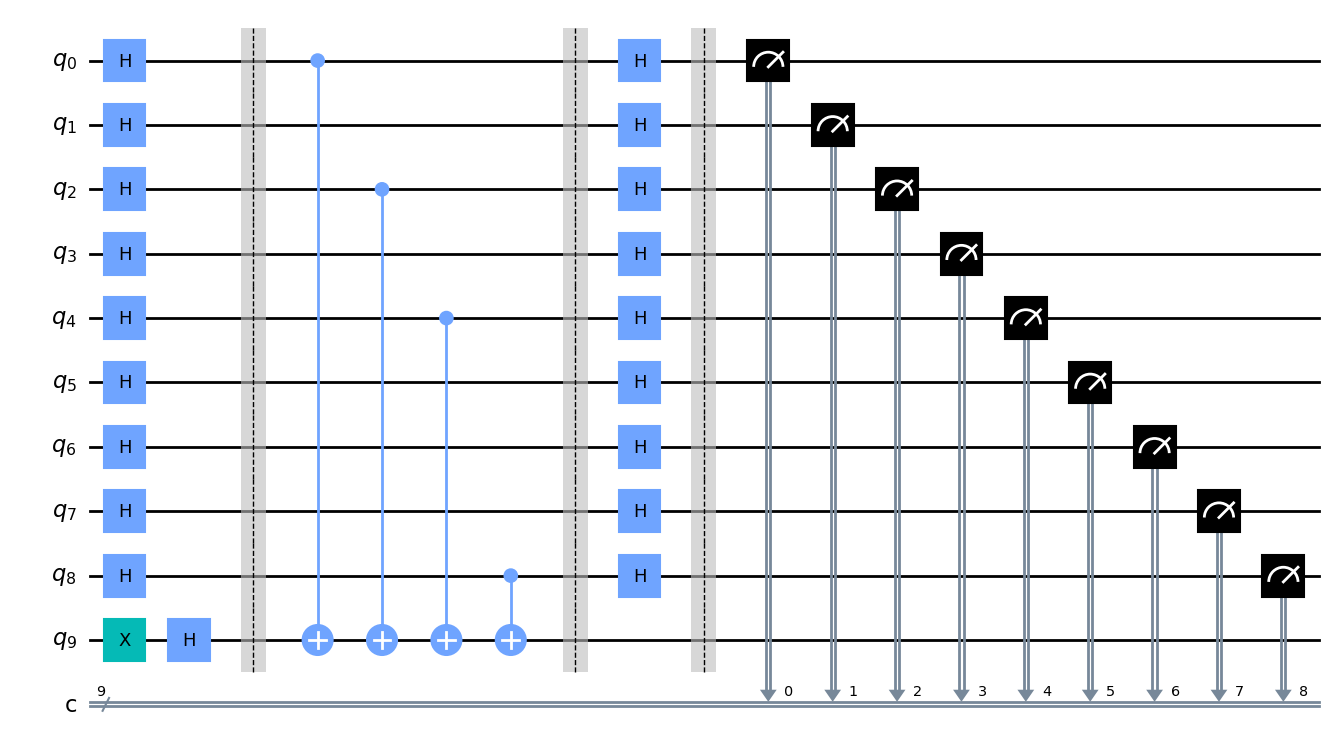

In [5]:
circuit.draw(output='mpl')

In [6]:
simulator= Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'100010101': 1}


In [1]:
plot_histogram([counts])

NameError: name 'plot_histogram' is not defined

Above whether you give one shot or 1024 shots in qasm simulator you get the same